# NOAA 1158: SDO/AIA Visualizations

In [1]:
import os
import glob
import warnings
import multiprocessing
warnings.filterwarnings('ignore')

import numpy as np
import scipy.ndimage
from sunpy.map import Map,GenericMap
from astropy.utils.console import ProgressBar
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.colors
from IPython.display import HTML

import synthesizAR
from synthesizAR.instruments import InstrumentSDOAIA

%matplotlib inline

Simple function for taking a quick look at all channels at a given timestamp.

In [2]:
def make_aia_frame(obs_time,root_dir,aia_instr,save_dir=None,submap=None,vmin=1,vmax=5e4,save_options=None):
    obs_time_index = np.where(aia_instr.observing_time==obs_time)[0][0]
    fig = plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.,hspace=0.,top=0.95)
    for i,chan in enumerate(aia_instr.channels):
        tmp = Map(os.path.join(root_dir, 'SDO_AIA/{}/map_t{:06d}.fits'.format(chan['name'],obs_time_index)))
        if submap:
            tmp = tmp.submap(*submap)
        ax = fig.add_subplot(2,3,i+1,projection=tmp)
        tmp.plot(annotate=False, norm=matplotlib.colors.SymLogNorm(1e-3,vmin=vmin,vmax=vmax))
        ax.coords[0].grid(alpha=0)
        ax.coords[1].grid(alpha=0)
        ax.coords[0].set_ticks_visible(False)
        ax.coords[1].set_ticks_visible(False)
        if i%3==0:
            ax.set_ylabel(r'solar-y [arcsec]',fontsize=14)
        else:
            ax.coords[1].set_ticklabel_visible(False)
        if i>2:
            ax.set_xlabel(r'solar-x [arcsec]',fontsize=14)
        else:
            ax.coords[0].set_ticklabel_visible(False)
        xtext,ytext = tmp.data_to_pixel(-230*u.arcsec,-130*u.arcsec)
        ax.text(xtext.value,ytext.value,
                r'${}$ $\mathrm{{\mathring{{A}}}}$'.format(chan['name']),
                color='w',fontsize=16)
        if i == 0:
            xtext,ytext = tmp.data_to_pixel(-410*u.arcsec,-130*u.arcsec)
            ax.text(xtext.value,ytext.value,r'$t={:.0f}$ s'.format(obs_time.value),
                    color='w',fontsize=14)
    fig.suptitle(r'$t={:.0f}$ s'.format(obs_time.value),fontsize=14)
    if save_dir:
        if not save_options: save_options = {'bbox_inches':'tight'}
        if 'format' not in save_options: save_options['format'] = 'png'
        fig.savefig(os.path.join(save_dir,'all_channels_map_t{:06d}.{}'.format(obs_time_index,save_options['format'])),
                    **save_options)
        fig.clf()

## Cooling Model

In [3]:
aia = InstrumentSDOAIA([0,10000]*u.s)

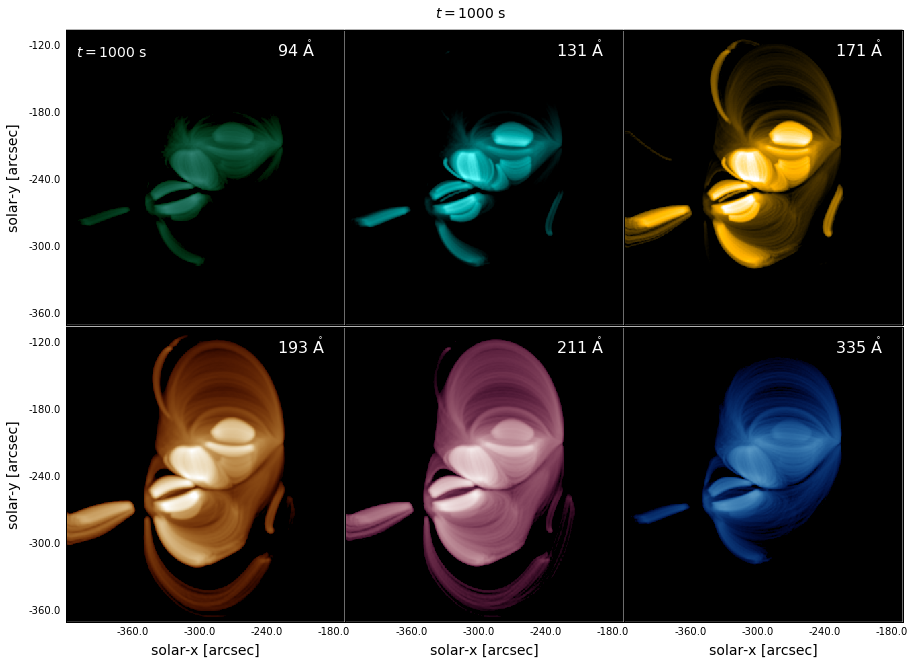

In [9]:
make_aia_frame(1000*u.s,'/storage-home/w/wtb2/data/noaa1158_cooling_model/',aia,vmin=1,vmax=2e4)

In [ ]:
fits_template = '/storage-home/w/wtb2/data/noaa1158_cooling_model/SDO_AIA/{}/map_t{:06d}.fits'
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.,hspace=0.,top=0.95)
ims = {}
for i,channel in enumerate(aia.channels):
    tmp = Map(fits_template.format(channel['name'],0))
    ax = fig.add_subplot(2,3,i+1,projection=tmp)
    ims[channel['name']] = tmp.plot(title=False,
                                    annotate=False,
                                    norm=matplotlib.colors.SymLogNorm(1e-10,vmin=1,vmax=5e4))
    ax.coords[0].grid(alpha=0)
    ax.coords[1].grid(alpha=0)
    ax.coords[0].set_ticks_visible(False)
    ax.coords[1].set_ticks_visible(False)
    if i%3==0:
        ax.set_ylabel(r'solar-y [arcsec]',fontsize=14)
    else:
        ax.coords[1].set_ticklabel_visible(False)
    if i>2:
        ax.set_xlabel(r'solar-x [arcsec]',fontsize=14)
    else:
        ax.coords[0].set_ticklabel_visible(False)
    xtext,ytext = tmp.data_to_pixel(-230*u.arcsec,-130*u.arcsec)
    ax.text(xtext.value,ytext.value,
                               r'${}$ $\mathrm{{\mathring{{A}}}}$'.format(channel['name']),
                               color='w',fontsize=16)
    fig.suptitle(r'$t={:.0f}$ s'.format(aia.observing_time[0].value),fontsize=14)

In [ ]:
def update_fig(i):
    for channel in aia.channels:
        tmp = Map(fits_template.format(channel['name'],i))
        ims[channel['name']].set_array(tmp.data)
    fig.suptitle(r'$t={:.0f}$ s'.format(aia.observing_time[i].value),fontsize=14)
    
    return [ims[k] for k in ims]

In [ ]:
anim = animation.FuncAnimation(fig,update_fig,
                               frames=range(1,len(aia.observing_time)),
                               interval=50,
                               blit=True,)

In [ ]:
anim.save('../sdo_aia_all_channels_cooling_model.mp4')

## High Frequency

In [24]:
aia = InstrumentSDOAIA([0,30000]*u.s)

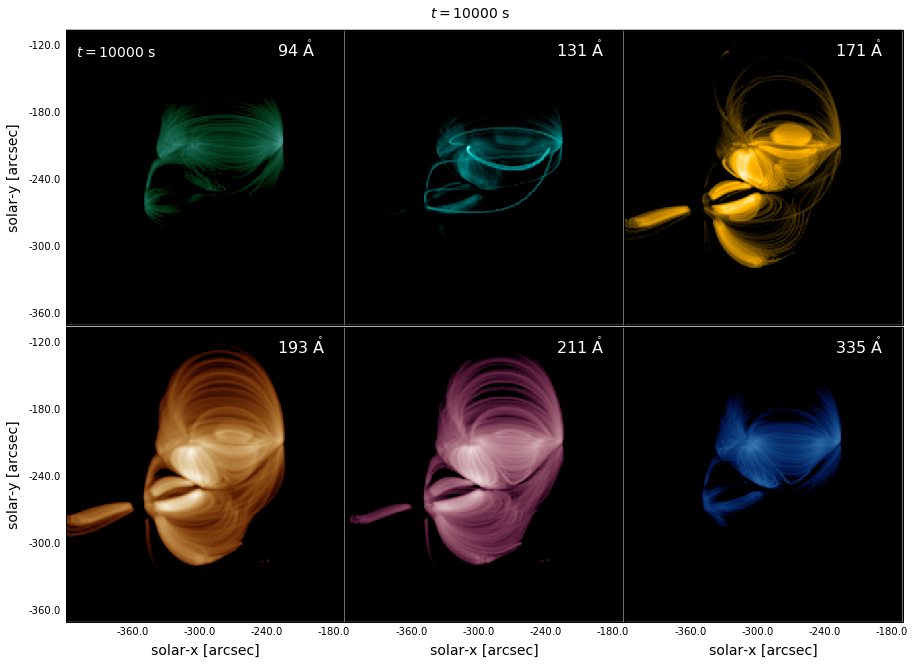

In [26]:
make_aia_frame(1e4*u.s,'/storage-home/w/wtb2/data/noaa1158_high_frequency/',aia,
               vmin=5,vmax=3e3)

Animation

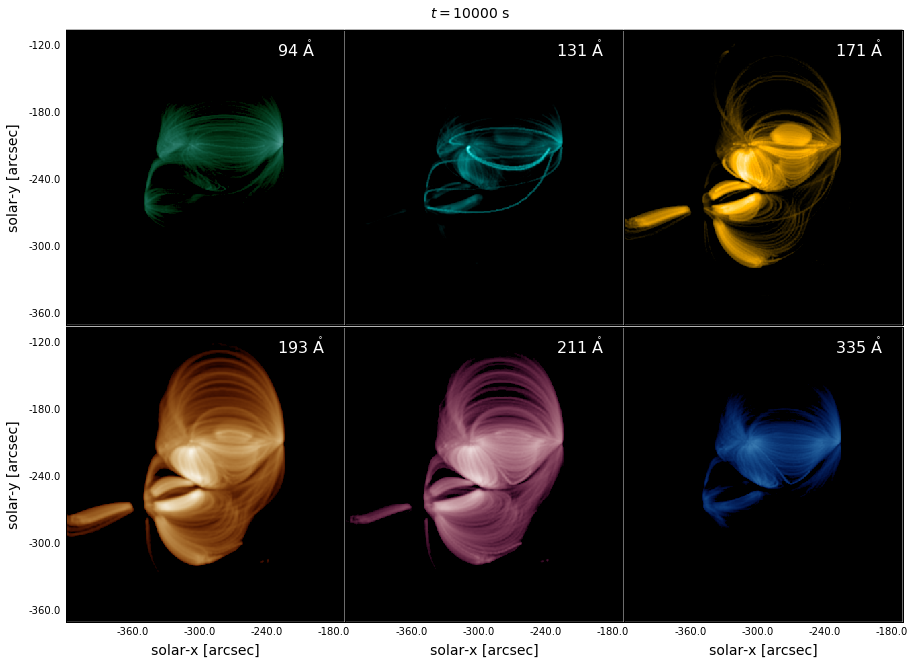

In [27]:
fits_template = '/storage-home/w/wtb2/data/noaa1158_high_frequency/SDO_AIA/{}/map_t{:06d}.fits'
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.,hspace=0.,top=0.95)
ims = {}
starting_index = 1000
stopping_index = 2000
for i,channel in enumerate(aia.channels):
    tmp = Map(fits_template.format(channel['name'],starting_index))
    ax = fig.add_subplot(2,3,i+1,projection=tmp)
    ims[channel['name']] = tmp.plot(title=False,
                                    annotate=False,
                                    norm=matplotlib.colors.SymLogNorm(1e-10,vmin=5,vmax=3e3))
    ax.coords[0].grid(alpha=0)
    ax.coords[1].grid(alpha=0)
    ax.coords[0].set_ticks_visible(False)
    ax.coords[1].set_ticks_visible(False)
    if i%3==0:
        ax.set_ylabel(r'solar-y [arcsec]',fontsize=14)
    else:
        ax.coords[1].set_ticklabel_visible(False)
    if i>2:
        ax.set_xlabel(r'solar-x [arcsec]',fontsize=14)
    else:
        ax.coords[0].set_ticklabel_visible(False)
    xtext,ytext = tmp.data_to_pixel(-230*u.arcsec,-130*u.arcsec)
    ax.text(xtext.value,ytext.value,
                               r'${}$ $\mathrm{{\mathring{{A}}}}$'.format(channel['name']),
                               color='w',fontsize=16)
    fig.suptitle(r'$t={:.0f}$ s'.format(aia.observing_time[starting_index].value),fontsize=14)

In [28]:
def update_fig(i):
    for channel in aia.channels:
        tmp = Map(fits_template.format(channel['name'],i))
        ims[channel['name']].set_array(tmp.data)
    fig.suptitle(r'$t={:.0f}$ s'.format(aia.observing_time[i].value),fontsize=14)
    
    return [ims[k] for k in ims]

In [29]:
anim = animation.FuncAnimation(fig,update_fig,
                               frames=range(starting_index,stopping_index),
                               interval=50,
                               blit=True,)

In [30]:
anim.save('../sdo_aia_all_channels_high_frequency.mp4')

## Intermediate Frequency

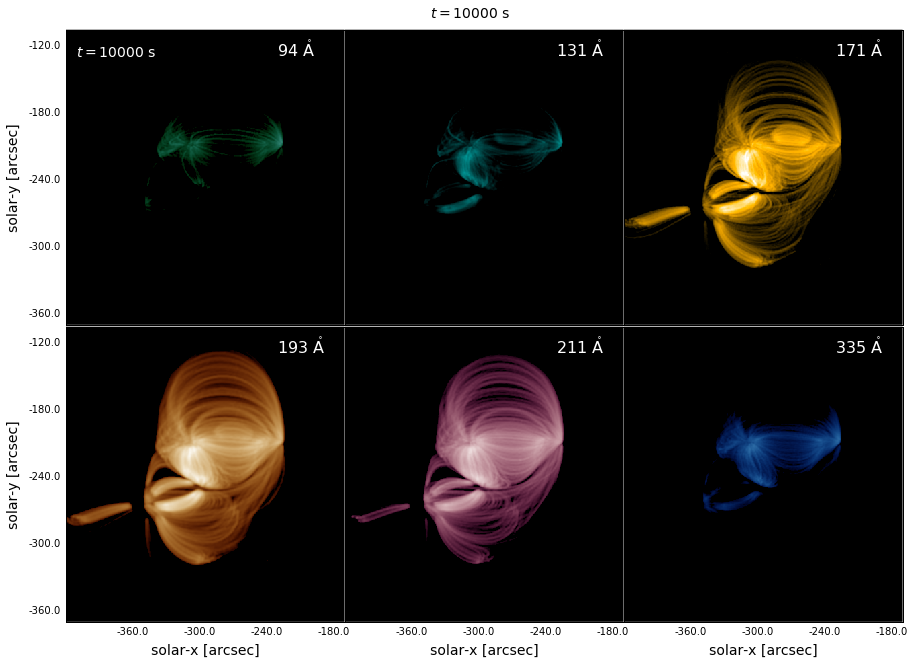

In [15]:
make_aia_frame(1e4*u.s,'/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/',aia,
               #submap=(u.Quantity([-360,-250],u.arcsec),u.Quantity([-300,-180],u.arcsec)),
               vmin=10,vmax=3e3)

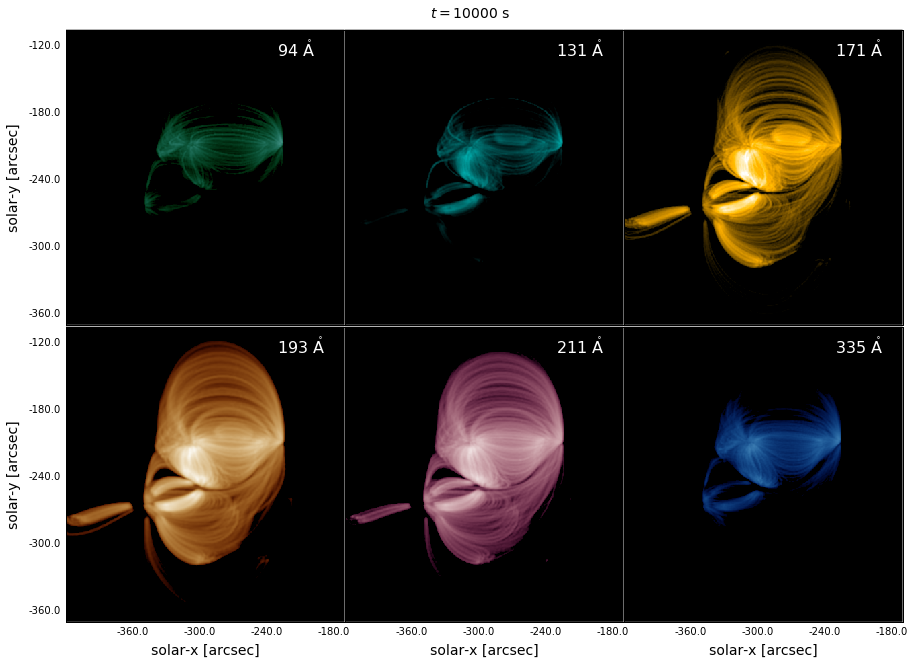

In [31]:
fits_template = '/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/SDO_AIA/{}/map_t{:06d}.fits'
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.,hspace=0.,top=0.95)
ims = {}
starting_index = 1000
stopping_index = 2000
for i,channel in enumerate(aia.channels):
    tmp = Map(fits_template.format(channel['name'],starting_index))
    ax = fig.add_subplot(2,3,i+1,projection=tmp)
    ims[channel['name']] = tmp.plot(title=False,
                                    annotate=False,
                                    norm=matplotlib.colors.SymLogNorm(1e-10,vmin=5,vmax=3e3))
    ax.coords[0].grid(alpha=0)
    ax.coords[1].grid(alpha=0)
    ax.coords[0].set_ticks_visible(False)
    ax.coords[1].set_ticks_visible(False)
    if i%3==0:
        ax.set_ylabel(r'solar-y [arcsec]',fontsize=14)
    else:
        ax.coords[1].set_ticklabel_visible(False)
    if i>2:
        ax.set_xlabel(r'solar-x [arcsec]',fontsize=14)
    else:
        ax.coords[0].set_ticklabel_visible(False)
    xtext,ytext = tmp.data_to_pixel(-230*u.arcsec,-130*u.arcsec)
    ax.text(xtext.value,ytext.value,
                               r'${}$ $\mathrm{{\mathring{{A}}}}$'.format(channel['name']),
                               color='w',fontsize=16)
    fig.suptitle(r'$t={:.0f}$ s'.format(aia.observing_time[starting_index].value),fontsize=14)

In [32]:
def update_fig(i):
    for channel in aia.channels:
        tmp = Map(fits_template.format(channel['name'],i))
        ims[channel['name']].set_array(tmp.data)
    fig.suptitle(r'$t={:.0f}$ s'.format(aia.observing_time[i].value),fontsize=14)
    
    return [ims[k] for k in ims]

In [33]:
anim = animation.FuncAnimation(fig,update_fig,
                               frames=range(starting_index,stopping_index),
                               interval=50,
                               blit=True,)

In [34]:
anim.save('../sdo_aia_all_channels_intermediate_frequency.mp4')

## Low Frequency

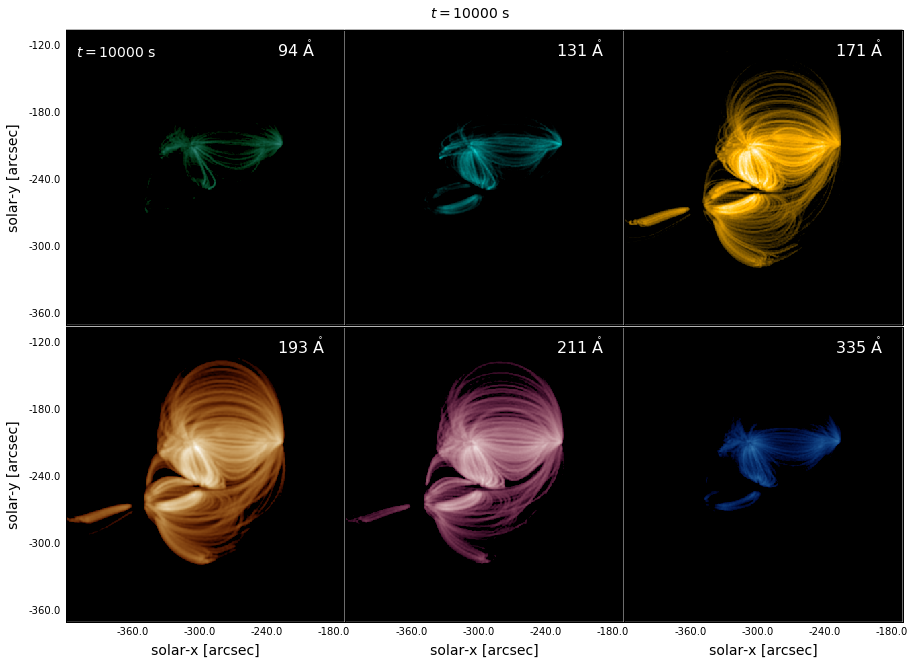

In [16]:
make_aia_frame(1e4*u.s,'/storage-home/w/wtb2/data/noaa1158_low_frequency/',aia,
               #submap=(u.Quantity([-360,-250],u.arcsec),u.Quantity([-250,-150],u.arcsec)),
               vmin=10,vmax=3e3)

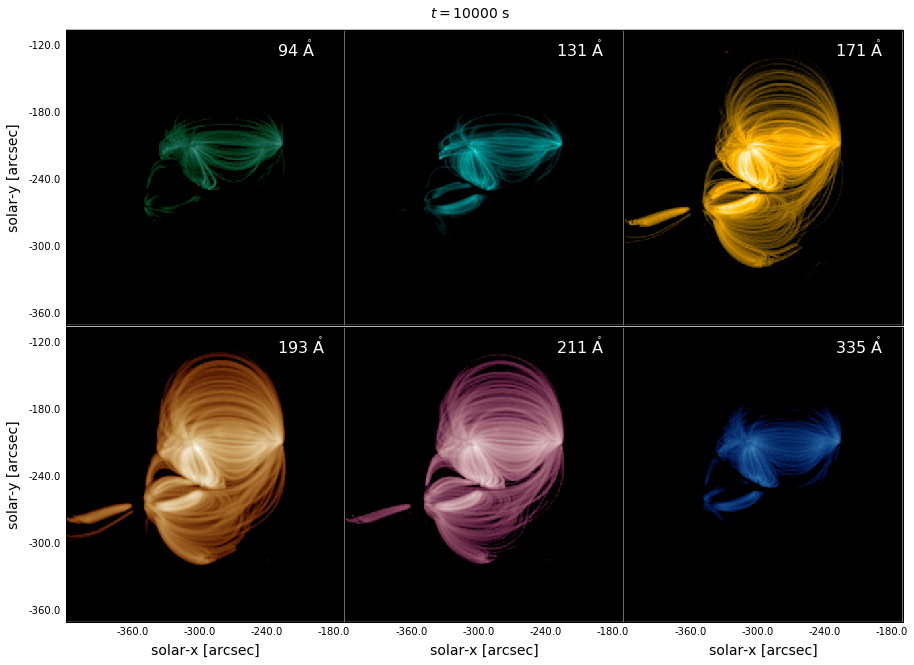

In [35]:
fits_template = '/storage-home/w/wtb2/data/noaa1158_low_frequency/SDO_AIA/{}/map_t{:06d}.fits'
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.,hspace=0.,top=0.95)
ims = {}
starting_index = 1000
stopping_index = 2000
for i,channel in enumerate(aia.channels):
    tmp = Map(fits_template.format(channel['name'],starting_index))
    ax = fig.add_subplot(2,3,i+1,projection=tmp)
    ims[channel['name']] = tmp.plot(title=False,
                                    annotate=False,
                                    norm=matplotlib.colors.SymLogNorm(1e-10,vmin=5,vmax=3e3))
    ax.coords[0].grid(alpha=0)
    ax.coords[1].grid(alpha=0)
    ax.coords[0].set_ticks_visible(False)
    ax.coords[1].set_ticks_visible(False)
    if i%3==0:
        ax.set_ylabel(r'solar-y [arcsec]',fontsize=14)
    else:
        ax.coords[1].set_ticklabel_visible(False)
    if i>2:
        ax.set_xlabel(r'solar-x [arcsec]',fontsize=14)
    else:
        ax.coords[0].set_ticklabel_visible(False)
    xtext,ytext = tmp.data_to_pixel(-230*u.arcsec,-130*u.arcsec)
    ax.text(xtext.value,ytext.value,
                               r'${}$ $\mathrm{{\mathring{{A}}}}$'.format(channel['name']),
                               color='w',fontsize=16)
    fig.suptitle(r'$t={:.0f}$ s'.format(aia.observing_time[starting_index].value),fontsize=14)

In [36]:
def update_fig(i):
    for channel in aia.channels:
        tmp = Map(fits_template.format(channel['name'],i))
        ims[channel['name']].set_array(tmp.data)
    fig.suptitle(r'$t={:.0f}$ s'.format(aia.observing_time[i].value),fontsize=14)
    
    return [ims[k] for k in ims]

In [ ]:
anim = animation.FuncAnimation(fig,update_fig,
                               frames=range(starting_index,stopping_index),
                               interval=50,
                               blit=True,)

In [ ]:
anim.save('../sdo_aia_all_channels_low_frequency.mp4')

## Composite Maps

In [ ]:
map_131 = Map('/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/SDO_AIA/131/map_t001500.fits',composite=True)
map_171 = Map('/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/SDO_AIA/171/map_t001500.fits')
map_193 = Map('/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/SDO_AIA/193/map_t001500.fits')
map_211 = Map('/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/SDO_AIA/211/map_t001500.fits')
map_335 = Map('/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/SDO_AIA/335/map_t001500.fits')
map_94 = Map('/storage-home/w/wtb2/data/noaa1158_high_frequency/SDO_AIA/94/map_t001500.fits')

In [ ]:
map_131.add_map(map_171)
map_131.add_map(map_193)
map_131.add_map(map_211)
map_131.add_map(map_335)
map_131.add_map(map_94)

In [ ]:
map_131.set_alpha(0,1)
map_131.set_alpha(1,0.1)
map_131.set_alpha(2,0.1)
map_131.set_alpha(3,0.1)
map_131.set_alpha(4,0.1)
map_131.set_alpha(5,0.1)

In [ ]:
fig = plt.figure(figsize=(10,10))
map_131.plot(norm=matplotlib.colors.SymLogNorm(1e-3,vmin=10,vmax=1e4))

## Histograms of Heating Events

In [ ]:
high_frequency_field = synthesizAR.Skeleton.restore('/storage-home/w/wtb2/data/noaa1158_high_frequency/field_checkpoint/')

In [ ]:
intermediate_frequency_field = synthesizAR.Skeleton.restore('/storage-home/w/wtb2/data/noaa1158_intermediate_frequency/field_checkpoint/')

In [ ]:
low_frequency_field = synthesizAR.Skeleton.restore('/storage-home/w/wtb2/data/noaa1158_low_frequency/field_checkpoint/')

In [ ]:
aia = InstrumentSDOAIA([0,3e4]*u.s)

In [ ]:
observer = synthesizAR.Observer(high_frequency_field,[aia])

In [ ]:
observer.build_detector_files('/storage-home/w/wtb2/data/noaa1158_high_frequency/',
                              ds=high_frequency_field._convert_angle_to_length(1.2*u.arcsec))

In [ ]:
number_of_events_unbinned = []

In [ ]:
for loop,interp_s in zip(high_frequency_field.loops,observer._interpolated_loop_coordinates):
    number_of_events_unbinned += interp_s.shape[0]*[len(loop.hydro_configuration['heating']['events'])]

In [ ]:
number_of_events_hist,_ = np.histogramdd(aia.total_coordinates.value[:,:2],
                                       bins=aia.bins[:2], range=aia.bin_range[:2],
                                       weights=np.array(number_of_events_unbinned))

In [ ]:
event_map = GenericMap(number_of_events_hist.T,aia.make_fits_header(high_frequency_field,aia.channels[0]))

In [ ]:
fig = plt.figure(figsize=(10,10))
event_map.plot(cmap='viridis',
               norm=matplotlib.colors.LogNorm(vmin=2,vmax=10000)
              )
plt.colorbar()

In [ ]:
event_maps = {}

In [ ]:
for field,name in zip([high_frequency_field,intermediate_frequency_field,low_frequency_field],
                      ['high','intermediate','low']):
    observer = synthesizAR.Observer(field,[aia])
    observer.build_detector_files('/storage-home/w/wtb2/data/noaa1158_{}_frequency/'.format(name),
                                  ds=field._convert_angle_to_length(1.2*u.arcsec))
    number_of_events_unbinned = []
    for loop,interp_s in zip(field.loops,observer._interpolated_loop_coordinates):
        tmp = [e for e in loop.hydro_configuration['heating']['events'] if 1e4<e['event']['rise_end']<2e4]
        number_of_events_unbinned += interp_s.shape[0]*[len(tmp)]
    number_of_events_hist,_ = np.histogramdd(aia.total_coordinates.value[:,:2],
                                             bins=aia.bins[:2], range=aia.bin_range[:2],
                                             weights=np.array(number_of_events_unbinned))
    event_maps[name] = GenericMap(number_of_events_hist.T,aia.make_fits_header(field,aia.channels[0]))

In [ ]:
fig = plt.figure(figsize=(20,8))
cax = fig.add_axes([0.1,0.1,0.8,0.05])
for i,em in enumerate(['high','intermediate','low']):
    ax = fig.add_subplot(1,3,i+1,projection=event_maps[em])
    im = event_maps[em].plot(annotate=False,cmap='magma',norm=matplotlib.colors.LogNorm(2,1e4),axes=ax)
    ax.set_title('{}-frequency heating'.format(em))
fig.colorbar(im,ax=ax,cax=cax,orientation='horizontal')

In [ ]:
foo = np.zeros((100,100))
foo[49:51,49:]

In [ ]:
plt.imshow(scipy.ndimage.gaussian_filter(foo,(1,1)))